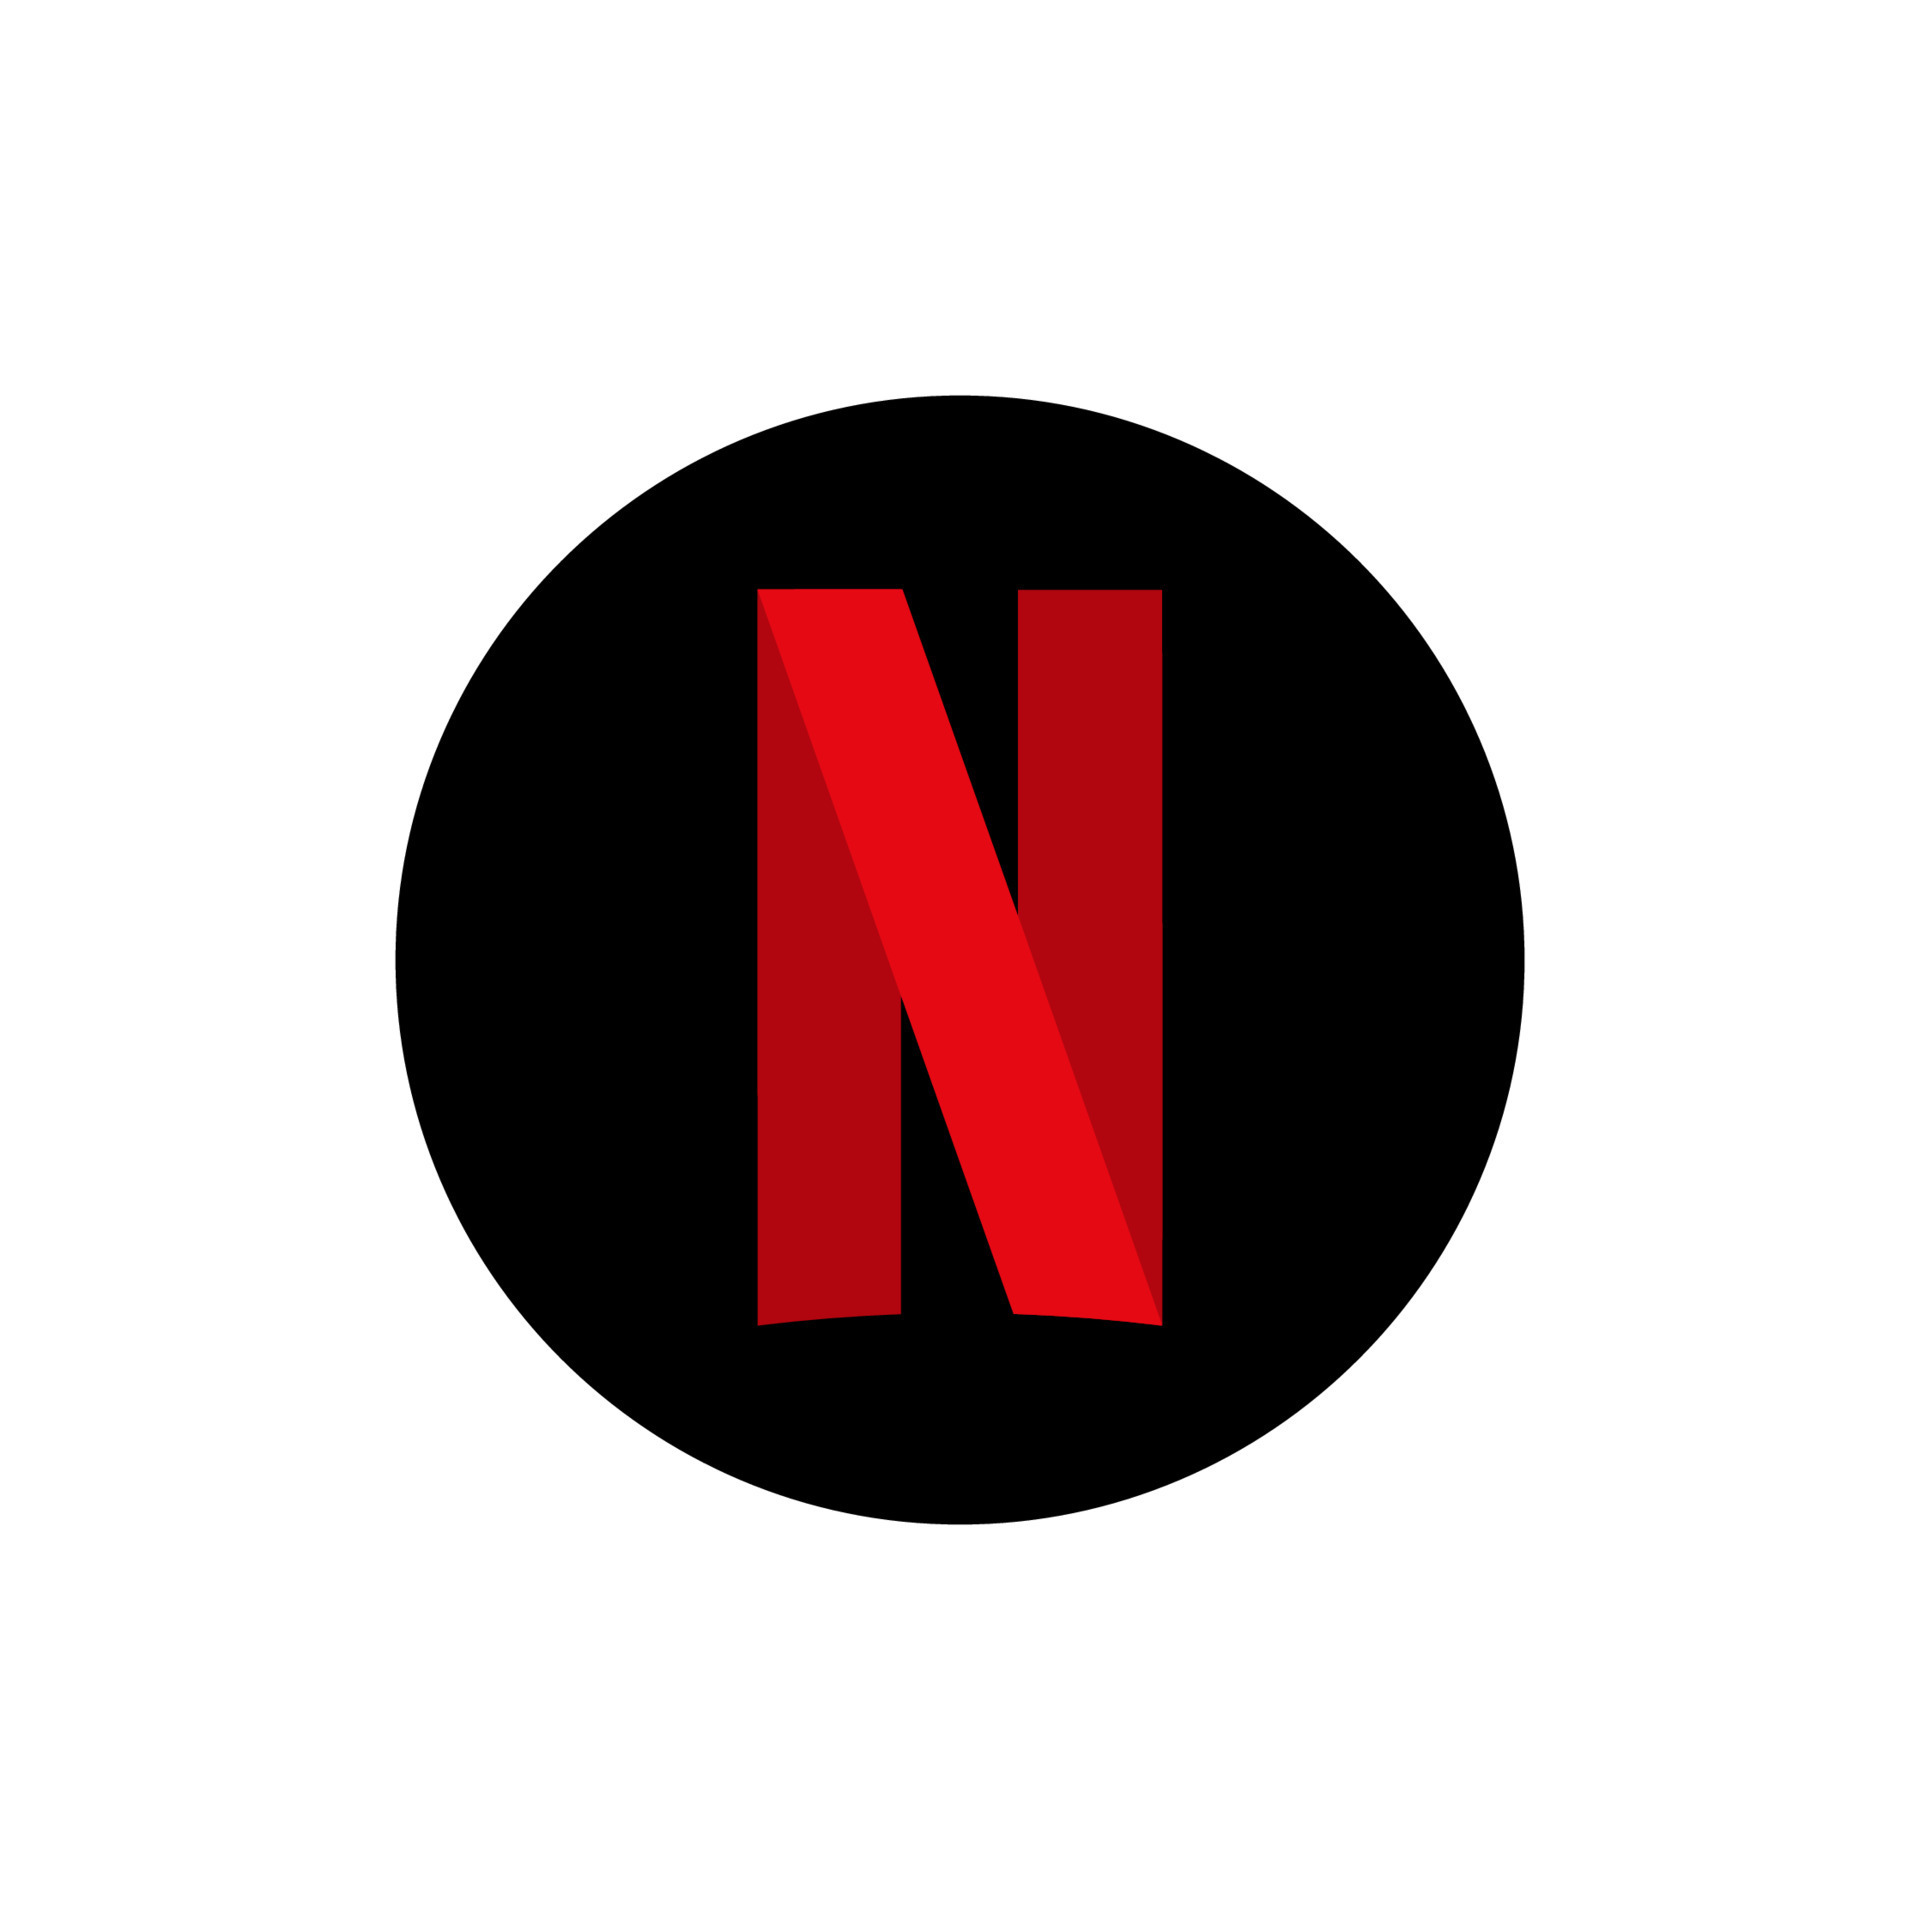

# Project Title: Exploratory Data Analysis - Netflix Movies and TV Shows
### Data url: https://www.kaggle.com/datasets/shivamb/netflix-shows/code
## Table of Contents:
<ul>
<li><a href="#part-1">Background Information</a></li>
<li><a href="#part-2">Data Cleaning and Preprocessing</a></li>
<li><a href="#part-3">Exploratory Data Analysis</a></li>
<li><a href="#part-4">Conclusions</a></li>
</ul>

<a id='part-1'></a>
## Background Information 
> Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Dataset Description 
>The dataset contains information about movies and TV shows, including details such as title, type (movie or TV show), director, cast, country, release year, duration, listed genres, and a brief description.

* `show_id`: Unique ID of each show
* `type`: Show category. Could be either a Movie or a TV Show.
* `title`: Name of the show
* `director`: Name of the director(s) of the show
* `cast`: Names of actors/actresses in the show
* `country`: Countries where the show is available to watch on Netflix
* `date_added`: Date when the show was added on Netflix
* `rating`: Show rating on Netflix
* `release_year`: Release year of the show
* `duration`: Time duration of the show
* `listed_in`: Genre of the show
* `description`: Brief insight into what the show is about


### Question(s) for Analysis
<ol>
    <li>What type of chart can be used to display the distribution of TV shows and movies on Netflix?</li>
    <li>What are the countries that have the most media (TV shows and movies) on Netflix, and how can we visualize this information using a bar chart?</li>
    <li>Which content items are considered the top 5 in terms of similarity, taking into account features such as title, genres, and description?</li>
    <li>How does the distribution of content types (TV shows and movies) vary across different genres?</li>
    <li>How has the number of content additions to Netflix changed over the years?</li>
    <li>How does the number of movies and TV shows released vary over the years?</li>
    <li>What is the distribution of ratings for the movies and TV shows in terms of a pie chart?</li>
    <li>How are the movies distributed across different countries?</li>
    <li>How are the TV shows distributed across different countries?</li>
    <li>Who are the top 10 directors based on the count of movies and TV shows they directed?</li>
    <li>Who are the top 10 actors based on the count of movies and TV shows they have appeared in?</li>
    <li>How is the distribution of ratings across different release years?</li>
    <li>Can you identify any notable keywords associated with popular TV shows and movies?</li>
    <li>What is the frequency of different genres in the dataset?</li>
    <li>How has the amount of content on Netflix evolved over time, and what trend can be observed starting from 2008 until 2020?</li>
    <li>What is the frequency distribution of TV show durations on Netflix?</li>
    <li>What is the frequency distribution of movie durations on Netflix?</li>
    <li>What are the most popular genres on Netflix based on their frequency counts?</li>
    <li>What is the distribution of ratings among movies and TV shows on Netflix?</li>
    <li>What are the proportions of the most widespread film durations and their corresponding labels?</li>
    <li>What does the word cloud visualization of countries based on their counts depict?</li>
    <li>What are the most popular genres in the USA according to the bar chart?</li>
    <li>What is the proportion of Turkey compared to the rest of the world based on the pie chart?</li>
</ol>

In [41]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Importing libaries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

from sklearn.impute import KNNImputer, SimpleImputer
import pandas as pd

from collections import Counter
import scipy.stats as stats

from sklearn.neighbors import LocalOutlierFactor

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import networkx as nx

from wordcloud import WordCloud

import matplotlib.cm as cm

# Introduction

Read the contents of the 'netflix_titles.csv' file and store it as a DataFrame named 'df'.

In [43]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Return the dimensions (number of rows and columns) of the DataFrame 'df'.

In [44]:
df.shape

(8807, 12)

Provide a summary of the DataFrame 'df', including the column names, data types, and information about the number of non-null values in each column.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Generate descriptive statistics of the numerical columns in the DataFrame 'df'.

In [46]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Generate descriptive statistics of the categorical (object) columns in the DataFrame 'df'.

In [47]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s4090,Movie,Angela's Christmas,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


Return the list of column names in the DataFrame 'df'.

In [48]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<a id='part-2'></a>
# Data Cleaning and Preprocessing

Calculate the number of missing values (null values) in each column of the DataFrame 'df' and return the sum of null values for each column.

In [49]:
df.isnull().mean()

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.094357
date_added      0.001135
release_year    0.000000
rating          0.000454
duration        0.000341
listed_in       0.000000
description     0.000000
dtype: float64

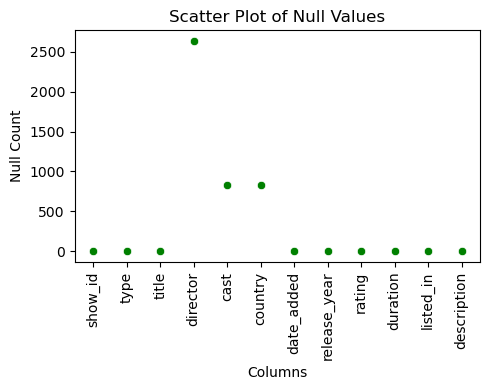

In [60]:
# Step 1: Calculate the total number of null values for each column
null_counts = df.isnull().sum()

# Step 2: Create a DataFrame with the column names and corresponding null counts
null_data = pd.DataFrame({'Columns': null_counts.index, 'Null Count': null_counts.values})

# Step 3: Create the scatter plot
plt.figure(figsize=(5,4))
sns.scatterplot(data=null_data, x='Columns', y='Null Count',color='green')

# Step 4: Customize the plot
plt.title('Scatter Plot of Null Values')
plt.xlabel('Columns')
plt.ylabel('Null Count')
plt.xticks(rotation=90)

# Step 5: Show the plot
plt.tight_layout()
plt.show()

In [11]:
df1=df.copy()
df1.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df["cast"]=df["cast"].fillna("Unknown")
df["director"]=df["director"].fillna("Unknown")
df["country"]=df["country"].fillna("Unknown")
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [13]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [14]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in']], df["description"], test_size=0.3, random_state=0)

# Create an instance of SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy="most_frequent")

# Fit the imputer on the training data
imputer.fit(X_train)

# Impute the missing values in the training and testing sets
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create new DataFrames with the imputed values and original column names
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Reset the index of the test set to start from the last index of the train set
X_test_imputed_df.reset_index(drop=True, inplace=True)

# Modify the original DataFrame with the imputed values
df.loc[X_train_imputed_df.index, X_train_imputed_df.columns] = X_train_imputed_df
df.loc[X_test_imputed_df.index, X_test_imputed_df.columns] = X_test_imputed_df

By using KNN imputation, the algorithm considers the relationships between the existing values and their neighbors, leading to more accurate imputation results and ultimately filling all missing values with valid data.

In [15]:
# Select the columns with missing values
columns_with_missing = ['director', 'cast', 'country', 'date_added', 'rating']

# Create a copy of the DataFrame
df_imputed = df.copy()

# Initialize KNNImputer for numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_imputer = KNNImputer(n_neighbors=5)
df_imputed[numeric_cols] = numeric_imputer.fit_transform(df_imputed[numeric_cols])

# Initialize SimpleImputer for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_imputed[columns_with_missing] = categorical_imputer.fit_transform(df_imputed[columns_with_missing])

# Check for any remaining missing values
print(df_imputed.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [16]:
data=df_imputed

Return a DataFrame consisting of the duplicated rows from the original DataFrame 'df'.

In [17]:
data[data.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [18]:
data["description"].nunique()

8775

In [19]:
len(data["description"])

8807

In [20]:
len(data[data["show_id"].duplicated()])

1869

Keep only the most recent entry for each show ID.

In [21]:
sorted_data = data.sort_values("date_added", ascending=False)
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [22]:
sorted_data = data.sort_values("date_added", ascending=False)
filtered_data = sorted_data.drop_duplicates(subset="show_id", keep="first")
len(filtered_data)

6938

In [23]:
filtered_data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4687,s90,TV Show,Mighty Raju,Unknown,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",Unknown,"September 9, 2021",2018.0,TV-Y7,4 Seasons,Kids' TV,Bickering siblings Shi Miao and Shi Fen tackle...
1190,s91,Movie,Paradise Hills,Alice Waddington,"Emma Roberts, Danielle Macdonald, Awkwafina, E...","Spain, United States","September 9, 2021",2020.0,TV-MA,95 min,"Sci-Fi & Fantasy, Thrillers",When a mysterious alien virus begins to endang...
4528,s92,Movie,The Women and the Murderer,"Mona Achache, Patricia Tourancheau",Unknown,France,"September 9, 2021",2018.0,TV-14,92 min,"Documentaries, International Movies",Two teenagers step into a secret closet and em...


In [24]:
data=filtered_data

Identify the outliers in the release_year column

In [25]:
numeric_data=data.select_dtypes(include=["int64"])
numeric_data=data[["release_year"]]

In [26]:
lof = LocalOutlierFactor(contamination='auto')

In [27]:
lof.fit(numeric_data)

LocalOutlierFactor()

In [28]:
outliers_lof = lof.fit_predict(numeric_data)

In [29]:
data[outliers_lof==-1].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
325,s2050,Movie,You're My Boss,Antoinette Jadaone,"Toni Gonzaga, Coco Martin, Freddie Webb, JM de...",Philippines,"September 4, 2020",1992.0,TV-14,117 min,"Comedies, International Movies, Romantic Movies",A father reluctantly agrees to let his childre...
8489,s8490,Movie,The River Wild,Curtis Hanson,"Meryl Streep, Kevin Bacon, David Strathairn, J...",United States,"September 1, 2018",1994.0,PG-13,111 min,Action & Adventure,A turbulent vacation turns deadly when a fugit...
1331,s1836,Movie,I Am Vengeance: Retaliation,Ross Boyask,"Stu Bennett, Vinnie Jones, Mark Griffin, Katri...",United Kingdom,"October 17, 2020",1945.0,R,82 min,Action & Adventure,This collection includes 12 World War II-era p...
6248,s6249,Movie,Basic Instinct,Paul Verhoeven,"Michael Douglas, Sharon Stone, George Dzundza,...","United States, France","October 1, 2020",1992.0,R,128 min,"Classic Movies, Thrillers",A detective investigating a rock star's brutal...
8614,s8615,Movie,Trainspotting,Danny Boyle,"Ewan McGregor, Ewen Bremner, Jonny Lee Miller,...",United Kingdom,"October 1, 2019",1996.0,R,94 min,"Comedies, Cult Movies, Dramas",Renton and his mates cope with the gritty real...


Looking for invalid values

In [30]:
data[~(data["duration"].str.endswith("min") | data["duration"].str.endswith("Seasons") | data["duration"].str.endswith("Season"))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


<a id='part-3'></a>
# Exploratory Data Analysis

### Q-1: What type of chart can be used to display the distribution of TV shows and movies on Netflix?

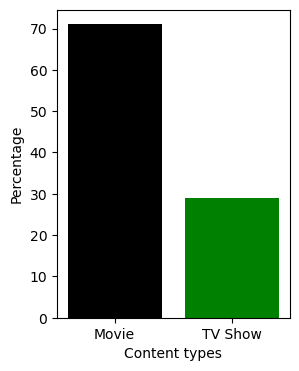

In [31]:
p=round(data["type"].value_counts(normalize=True),2)*100
plt.figure(figsize=(3,4))
plt.bar(p.index, p.values,color=["black","green"])
plt.xlabel("Content types")
plt.ylabel("Percentage");

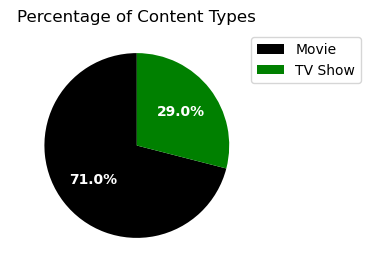

In [32]:
p = round(data["type"].value_counts(normalize=True), 2) * 100
plt.figure(figsize=(3, 3))
plt.pie(p.values, labels=p.index, autopct='%1.1f%%', startangle=90, colors=["black", "green"],textprops={'color': "white", 'fontweight': 'bold'})
plt.title("Percentage of Content Types")
plt.legend(loc='upper right',bbox_to_anchor=(1.5, 1))
plt.show()

#### INSIGHT: While movies account for  71%, the proportion of TV Shows is 29%.

### Q-2: What are the countries that have the most media (TV shows and movies) on Netflix, and how can we visualize this information using a bar chart?

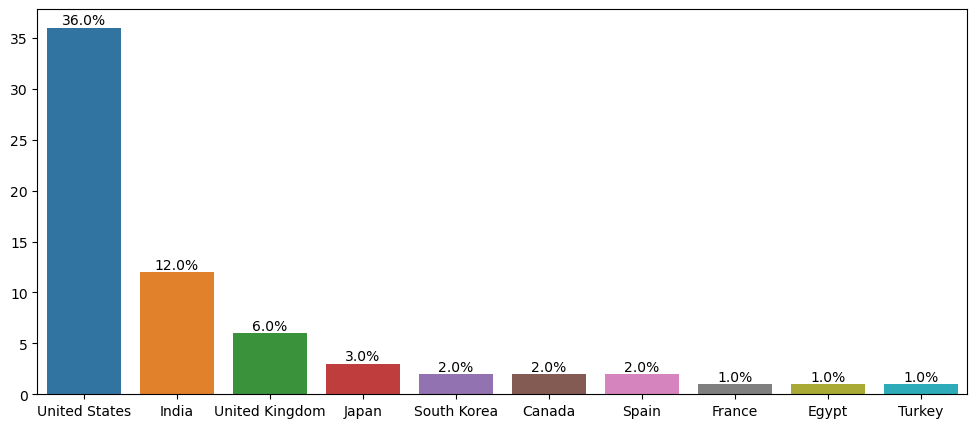

In [33]:
data_n=data.drop(data[data['country'] == 'Unknown'].index)
p=round(data_n["country"].value_counts(normalize=True).head(10),2)*100
plt.figure(figsize=(12,5))
ax=sns.barplot(x=p.index,y=p.values,data=data_n)
for i, v in enumerate(p.values):
    ax.text(i, v, str(v) + '%', ha='center', va='bottom')
plt.show()

#### INSIGHT: The US has the most media on Netflix.

### Q-3: Which content items are considered the top 5 in terms of similarity, taking into account features such as title, genres, and description?

In [34]:
data.shape

(6938, 12)

In [37]:
selected_columns = ['title', 'listed_in', 'description']
data_new = data.copy()
data_new['new_column'] = data[selected_columns].apply(lambda x: ' '.join(x), axis=1)
vectorizer = TfidfVectorizer()
feature_matrix = vectorizer.fit_transform(data_new['new_column'])
similarity_matrix = cosine_similarity(feature_matrix)
reference_index = 0
similarity_scores = similarity_matrix[reference_index]
top_indices = similarity_scores.argsort()[::-1]
num_top_similar = 5
top_similar_content = data_new.iloc[top_indices[1:num_top_similar+1]].copy()
top_similar_content

#top_similar_content[['title', 'listed_in', 'description']]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,new_column
3614,s8471,Movie,The Push,"Grant Korgan, Brian Niles",Grant Korgan,United States,"June 7, 2019",2012.0,TV-MA,90 min,"Documentaries, Sports Movies","As a teen, Shi Won was obsessed with a boy ban...","The Push Documentaries, Sports Movies As a tee..."
3135,s2078,Movie,The Match,Francesco Carnesecchi,"Francesco Pannofino, Alberto Di Stasio, Gabrie...",Italy,"September 1, 2020",2013.0,TV-MA,97 min,"Dramas, International Movies, Sports Movies",Four young male friends tackle the challenges ...,"The Match Dramas, International Movies, Sports..."
5950,s1430,TV Show,Mighty Little Bheem: Kite Festival,Unknown,"Sumruddhi Shukla, Aranya Kaur, Nishka Raheja",India,"January 8, 2021",1991.0,TV-Y,1 Season,"Kids' TV, TV Comedies","This drama tells the tale of Ricky Bell, a pro...","Mighty Little Bheem: Kite Festival Kids' TV, T..."
1895,s3992,Movie,The Super Parental Guardians,Joyce Bernal,"Vice Ganda, Coco Martin, Onyok Pineda, Awra Br...",Philippines,"March 21, 2019",2009.0,TV-14,115 min,"Action & Adventure, Comedies, International Mo...",The gals in this fantasy series cope with the ...,The Super Parental Guardians Action & Adventur...
2275,s7281,Movie,Lechmi,B.N. Shajeer Sha,"Parvathy Ratheesh, Biju Sopanam, Sethulekshmi ...",India,"August 1, 2018",2020.0,TV-MA,147 min,"Comedies, Horror Movies, International Movies","Despite their fathers' rivalry, two university...","Lechmi Comedies, Horror Movies, International ..."


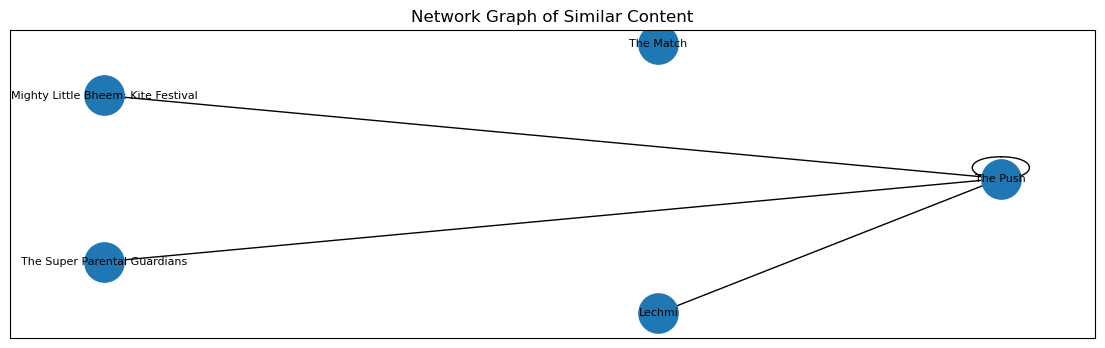

In [38]:
plt.figure(figsize=(14,4))
# Create an empty graph
graph = nx.Graph()

# Add nodes to the graph with content titles
for index, row in top_similar_content.iterrows():
    graph.add_node(row['title'])

# Add edges to the graph based on the similarity between content titles
for index, row in top_similar_content.iterrows():
    similarity_score = similarity_scores[index]
    if similarity_score > 0:
        graph.add_edge(top_similar_content.iloc[reference_index]['title'], row['title'], weight=similarity_score)

# Set the positions of the nodes using a circular layout
pos = nx.circular_layout(graph)

# Draw the network graph with node labels
nx.draw_networkx(graph, pos, with_labels=True, node_size=800, font_size=8)

# Set the plot title
plt.title('Network Graph of Similar Content');

#### INSIGHT: The Match; The Push; Mighty Little Bheem: Kite Festival; The Super Parental Guardians; Lechmi are the top similar contents.

### Q-4: How does the distribution of content types (TV shows and movies) vary across different genres?  

In [77]:
#data.groupby(["listed_in","type"]).size().unstack()
data.groupby('type')['listed_in'].value_counts()

type     listed_in                                       
Movie    Documentaries                                       304
         Dramas, International Movies                        292
         Stand-Up Comedy                                     224
         Comedies, Dramas, International Movies              204
         Dramas, Independent Movies, International Movies    200
                                                            ... 
TV Show  TV Dramas, TV Sci-Fi & Fantasy                        1
         TV Dramas, TV Sci-Fi & Fantasy, TV Thrillers          1
         TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows         1
         TV Horror, TV Mysteries, Teen TV Shows                1
         TV Sci-Fi & Fantasy, TV Thrillers                     1
Name: listed_in, Length: 481, dtype: int64

In [78]:
# Group the data by type and listed_in, and count the occurrences
grouped_df = data.groupby('type')['listed_in'].value_counts().reset_index(level='type')
grouped_df

,type,listed_in
listed_in,,
Documentaries,Movie,304
"Dramas, International Movies",Movie,292
Stand-Up Comedy,Movie,224
"Comedies, Dramas, International Movies",Movie,204
"Dramas, Independent Movies, International Movies",Movie,200
...,...,...
"TV Dramas, TV Sci-Fi & Fantasy",TV Show,1
"TV Dramas, TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
"TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows",TV Show,1


In [79]:
top= grouped_df.groupby('type')['listed_in'].nlargest(5)
top

type     listed_in                                             
Movie    Documentaries                                             304
         Dramas, International Movies                              292
         Stand-Up Comedy                                           224
         Comedies, Dramas, International Movies                    204
         Dramas, Independent Movies, International Movies          200
TV Show  Kids' TV                                                  177
         International TV Shows, TV Dramas                          91
         Crime TV Shows, International TV Shows, TV Dramas          88
         Kids' TV, TV Comedies                                      74
         International TV Shows, Romantic TV Shows, TV Comedies     73
Name: listed_in, dtype: int64

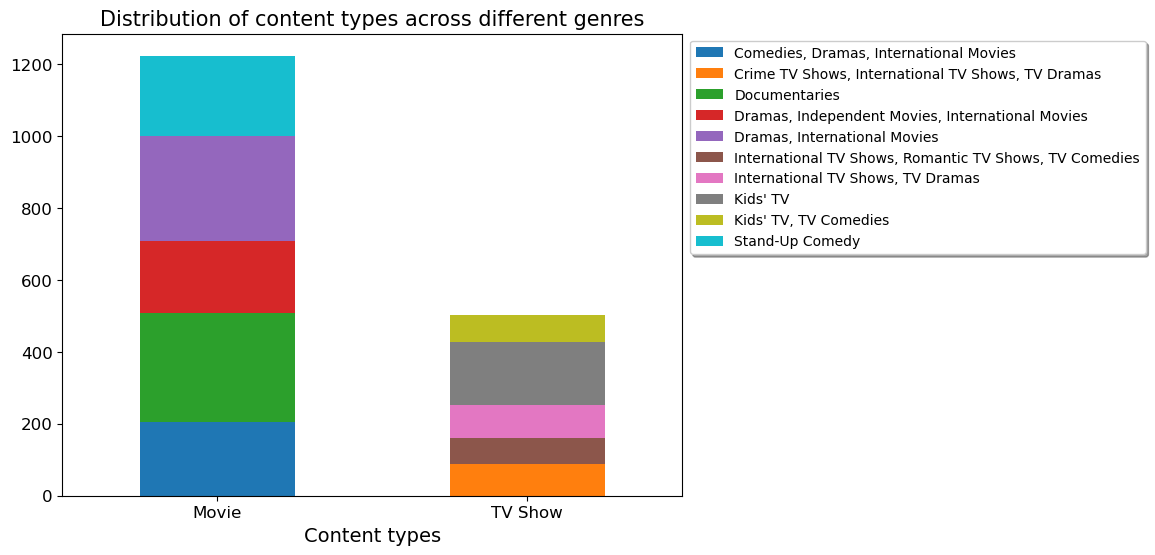

In [80]:
(top.unstack()).plot(kind="bar", stacked=True, figsize=(8, 6))

handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.38, 1), shadow=True, ncol=1)

plt.title("Distribution of content types across different genres",fontsize=15);
plt.xticks(fontsize=12,rotation=360)
plt.xlabel("Content types",fontsize=14)
plt.yticks(fontsize=12);

### Q-5: How has the number of content additions to Netflix changed over the years?

In [81]:
data["date_added"].value_counts()

January 1, 2020       108
November 1, 2019       81
March 1, 2018          71
December 31, 2019      69
October 1, 2018        56
                     ... 
October 13, 2020        1
November 30, 2017       1
July 12, 2017           1
August 14, 2015         1
 December 28, 2016      1
Name: date_added, Length: 1659, dtype: int64

In [82]:
date=data[["date_added"]]
date.head(2)

,date_added
4687,"September 9, 2021"
1190,"September 9, 2021"


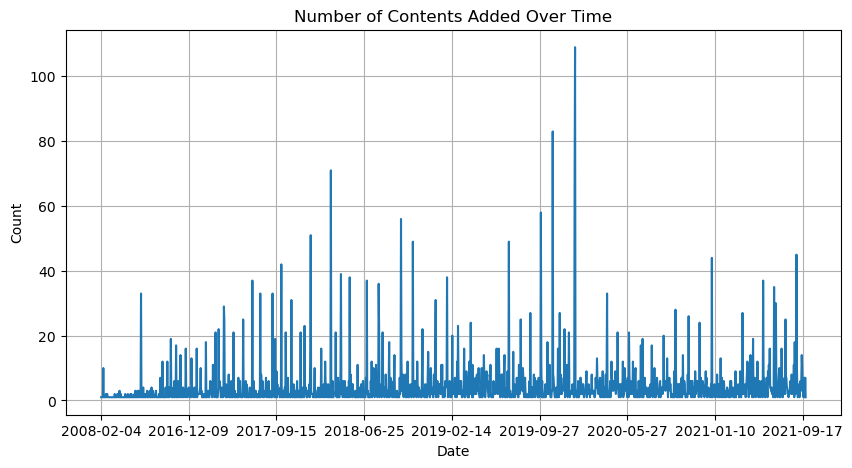

In [83]:
date_column = date["date_added"].str.strip()

# Convert the date column to datetime format
formatted_dates = pd.to_datetime(date_column, format="%B %d, %Y").dt.strftime("%Y-%m-%d")

# Print the formatted dates
formatted_dates=pd.DataFrame(formatted_dates)
c=formatted_dates.groupby('date_added').size()

plt.figure(figsize=(10, 5))
c.plot(kind='line')
plt.title('Number of Contents Added Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True);

#### INSIGHT: Significant fluctuation is observed in the number of contents added over the timeframe from 2008 to 2021.

### How does the distribution of the 'Year' variable look like based on the histogram and Q-Q plot?

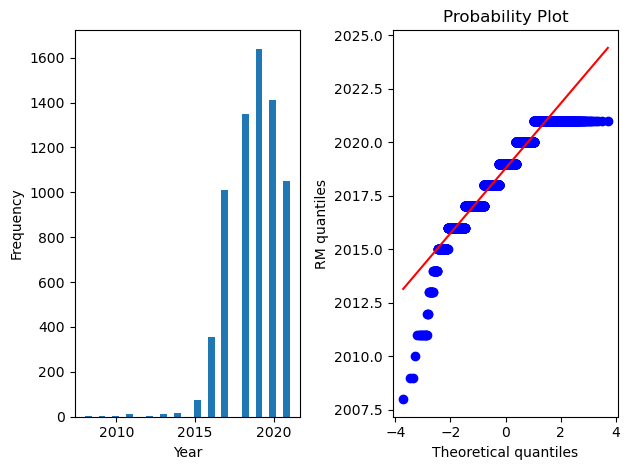

In [84]:
def diagnostic_plots(df, variable):
    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[variable], bins=30)
    plt.xlabel(variable)
    plt.ylabel('Frequency')

    # Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    plt.tight_layout()
    plt.show()

# Example date column
date_column = date["date_added"]

# Print the formatted dates
formatted_dates = pd.DataFrame(date_column)

# Extract the year from the date
formatted_dates['Year'] = pd.to_datetime(formatted_dates['date_added']).dt.year

diagnostic_plots(formatted_dates, 'Year')

### Q-6: How does the number of movies and TV shows released vary over the years?

In [85]:
grouped=data.groupby(["release_year","type"]).size().reset_index(name="count")
grouped

,release_year,type,count
0,1925.0,Movie,1
1,1942.0,Movie,1
2,1944.0,Movie,2
3,1945.0,Movie,3
4,1946.0,Movie,1
...,...,...,...
117,2019.0,TV Show,256
118,2020.0,Movie,546
119,2020.0,TV Show,270
120,2021.0,Movie,339


In [86]:
movies=grouped[grouped["type"]=="Movie"]
movies.head(2)

,release_year,type,count
0,1925.0,Movie,1
1,1942.0,Movie,1


In [87]:
tv_show=grouped[grouped["type"]=="TV Show"]
tv_show.head(2)

,release_year,type,count
8,1958.0,TV Show,1
9,1959.0,TV Show,1


In [88]:
total_counts=grouped.groupby("release_year")["count"].sum().reset_index(name='total_count')
total_counts.head(2)

,release_year,total_count
0,1925.0,1
1,1942.0,1


In [89]:
movies_ratio = movies.merge(total_counts, on='release_year')
movies_ratio["ratio"]=movies_ratio["count"]/movies_ratio["total_count"]
movies_ratio.head(2)

,release_year,type,count,total_count,ratio
0,1925.0,Movie,1,1,1.0
1,1942.0,Movie,1,1,1.0


In [90]:
tv_show_ratio = tv_show.merge(total_counts, on='release_year')
tv_show_ratio["ratio"]=tv_show_ratio["count"]/tv_show_ratio["total_count"]
tv_show_ratio.head(2)

,release_year,type,count,total_count,ratio
0,1958.0,TV Show,1,2,0.5
1,1959.0,TV Show,1,1,1.0


In [91]:
movies_ratio["release_year"]=movies_ratio["release_year"].astype('int')
tv_show_ratio["release_year"]=tv_show_ratio["release_year"].astype('int')

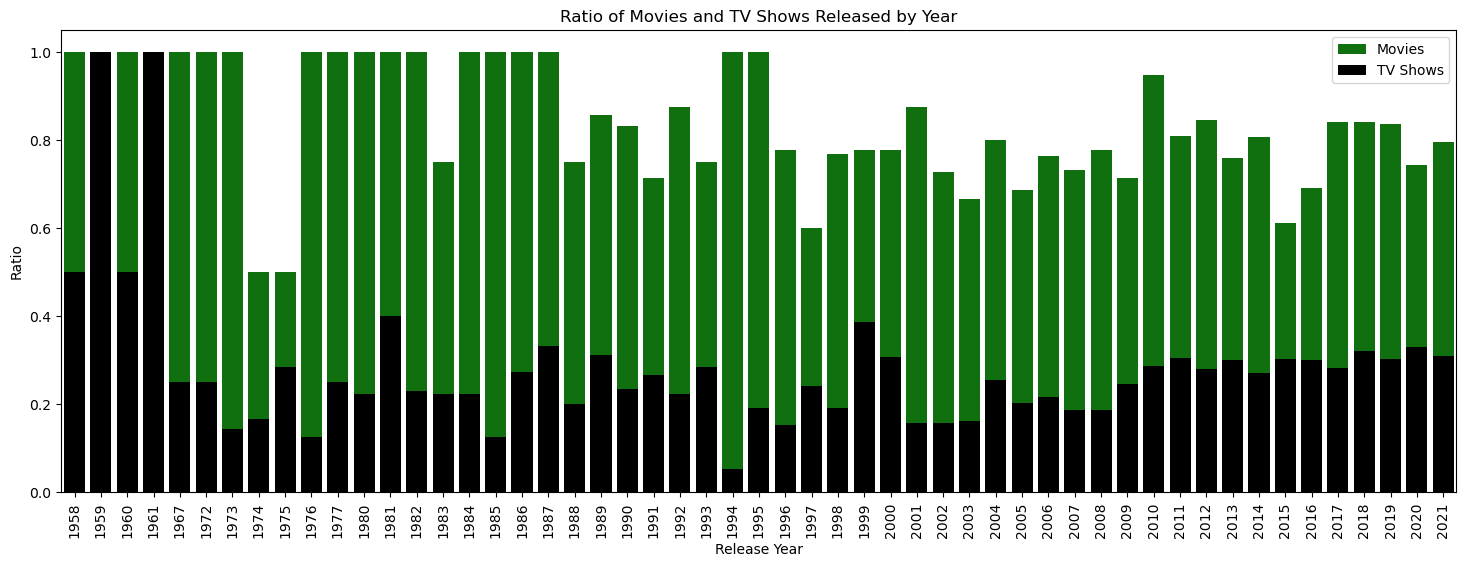

In [92]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 6))

sns.barplot(x='release_year', y='ratio', data=movies_ratio, color='green', ax=ax, label='Movies')
sns.barplot(x='release_year', y='ratio', data=tv_show_ratio, color='black', ax=ax, label='TV Shows')
# Add labels and title
ax.set_xlabel('Release Year')
ax.set_ylabel('Ratio')
ax.set_title('Ratio of Movies and TV Shows Released by Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Display the plot
plt.show()

### Q-7: What is the distribution of ratings for the movies and TV shows in terms of a pie chart?

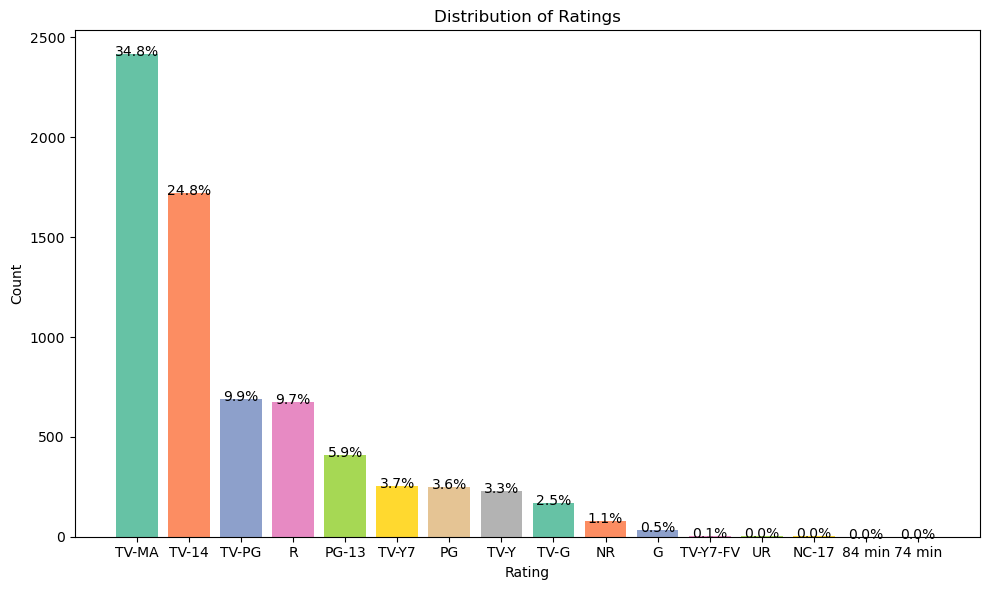

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rating_counts = data['rating'].value_counts()
sizes = rating_counts.values
labels = rating_counts.index
total = rating_counts.sum()
rates = sizes / total

fig, ax = plt.subplots(figsize=(10, 6))

# Use a color palette for the bars
colors = sns.color_palette('Set2')

ax.bar(labels, sizes, color=colors)

ax.set_title('Distribution of Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add percentages above each bar
for i, (size, rate) in enumerate(zip(sizes, rates)):
    percentage = '{:.1f}%'.format(rate * 100)
    ax.text(i, size + 10, percentage, ha='center', va='center')

plt.tight_layout()
plt.show()

#### INSIGHT: The largest proportion is contributed by TV-MA, followed by TV-14.

### Q-8: How are the movies distributed across different countries?

In [94]:
movies_data = data[data['type'] == 'Movie']

In [95]:
movies_data.shape

(4918, 12)

In [96]:
country_raw_list = movies_data['country'].str.lower().str.split(',')
country_raw_list=[i for item in country_raw_list for i in item if i!="unknown"]
country_raw_list

['spain',
 ' united states',
 'france',
 'united states',
 'india',
 'france',
 'united states',
 ' india',
 ' south korea',
 ' china',
 'france',
 ' united kingdom',
 ' united states',
 'france',
 ' new zealand',
 'south korea',
 'netherlands',
 ' belgium',
 ' united kingdom',
 ' united states',
 'united states',
 ' uruguay',
 'united states',
 'united states',
 ' united kingdom',
 ' denmark',
 ' sweden',
 'united states',
 'united states',
 'france',
 ' belgium',
 'united states',
 'bulgaria',
 ' united states',
 ' spain',
 ' canada',
 'united states',
 'united states',
 'united states',
 'united states',
 ' greece',
 'south africa',
 'united states',
 'united states',
 '',
 'thailand',
 'belgium',
 ' united kingdom',
 ' united states',
 'belgium',
 ' france',
 'india',
 'india',
 'india',
 'turkey',
 'india',
 'united states',
 'united kingdom',
 'united kingdom',
 'india',
 'united states',
 'united kingdom',
 'united states',
 'thailand',
 'thailand',
 'thailand',
 'thailand',
 't

In [97]:
country_list = [p.strip().title() for p in country_raw_list]
country_list

['Spain',
 'United States',
 'France',
 'United States',
 'India',
 'France',
 'United States',
 'India',
 'South Korea',
 'China',
 'France',
 'United Kingdom',
 'United States',
 'France',
 'New Zealand',
 'South Korea',
 'Netherlands',
 'Belgium',
 'United Kingdom',
 'United States',
 'United States',
 'Uruguay',
 'United States',
 'United States',
 'United Kingdom',
 'Denmark',
 'Sweden',
 'United States',
 'United States',
 'France',
 'Belgium',
 'United States',
 'Bulgaria',
 'United States',
 'Spain',
 'Canada',
 'United States',
 'United States',
 'United States',
 'United States',
 'Greece',
 'South Africa',
 'United States',
 'United States',
 '',
 'Thailand',
 'Belgium',
 'United Kingdom',
 'United States',
 'Belgium',
 'France',
 'India',
 'India',
 'India',
 'Turkey',
 'India',
 'United States',
 'United Kingdom',
 'United Kingdom',
 'India',
 'United States',
 'United Kingdom',
 'United States',
 'Thailand',
 'Thailand',
 'Thailand',
 'Thailand',
 'Thailand',
 'Thailand',

In [98]:
country_count = Counter(country_list)

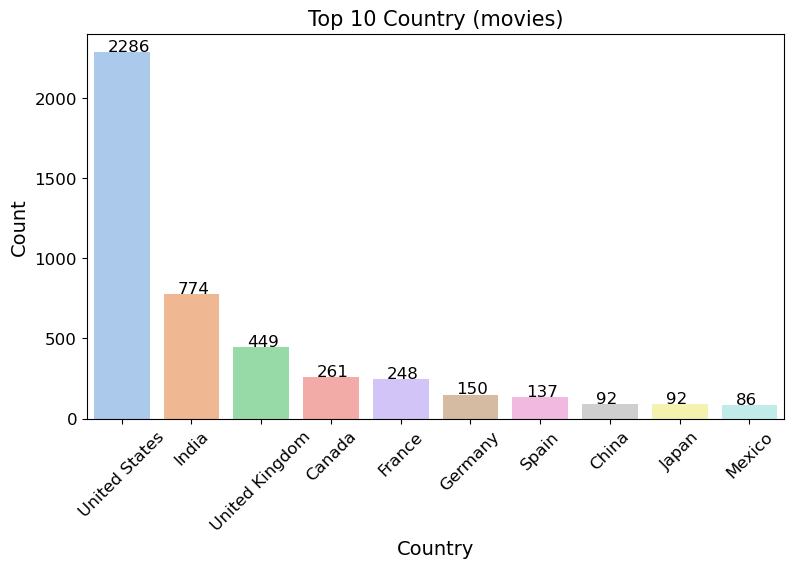

In [99]:
country_df = pd.DataFrame.from_dict(country_count, orient='index', columns=['Count']).reset_index().rename(columns={'index': 'Country'})
country_df.sort_values(by='Count', ascending=False, inplace=True)


plt.figure(figsize=(9,5))
ax = sns.barplot(data=country_df.head(10),x='Country',y='Count',palette='pastel')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+0.2, p.get_height()+5), fontsize=12)

plt.xticks(rotation=45,fontsize=12)
plt.xlabel("Country",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Count",fontsize=14)
plt.title('Top 10 Country (movies)',fontsize=15)

plt.show()

### Q-9: How are the TV Shows distributed across different countries?

In [355]:
tv_shows_data = data[data['type'] == 'TV Show']
tv_shows_data.shape

(2020, 12)

In [356]:
country_raw_list = tv_shows_data['country'].str.lower().str.split(',')
country_raw_list=[i for item in country_raw_list for i in item if i!="unknown"]
country_raw_list

['united states',
 'south korea',
 'united states',
 'united states',
 'united kingdom',
 ' ireland',
 'spain',
 'united states',
 'france',
 ' united states',
 'united kingdom',
 'united states',
 'united states',
 'united states',
 'australia',
 ' new zealand',
 ' united states',
 'united states',
 'united states',
 'united states',
 'united states',
 'united states',
 'united states',
 'united states',
 'japan',
 'united states',
 'united states',
 'united states',
 'united states',
 'united states',
 'united states',
 'united states',
 'united kingdom',
 'united states',
 ' singapore',
 'united kingdom',
 'united states',
 'united states',
 'united states',
 'canada',
 'united states',
 'argentina',
 'united states',
 ' japan',
 'south korea',
 'united states',
 'united states',
 'canada',
 'united kingdom',
 'united states',
 'united states',
 'turkey',
 'united states',
 'australia',
 'south korea',
 'united states',
 'japan',
 'united states',
 'germany',
 'spain',
 'united stat

In [357]:
country_list = [p.strip().title() for p in country_raw_list]
country_list

['United States',
 'South Korea',
 'United States',
 'United States',
 'United Kingdom',
 'Ireland',
 'Spain',
 'United States',
 'France',
 'United States',
 'United Kingdom',
 'United States',
 'United States',
 'United States',
 'Australia',
 'New Zealand',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Japan',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United Kingdom',
 'United States',
 'Singapore',
 'United Kingdom',
 'United States',
 'United States',
 'United States',
 'Canada',
 'United States',
 'Argentina',
 'United States',
 'Japan',
 'South Korea',
 'United States',
 'United States',
 'Canada',
 'United Kingdom',
 'United States',
 'United States',
 'Turkey',
 'United States',
 'Australia',
 'South Korea',
 'United States',
 'Japan',
 'United States',
 'Germany',
 'Spain',
 'United States',
 

In [358]:
country_count = Counter(country_list)

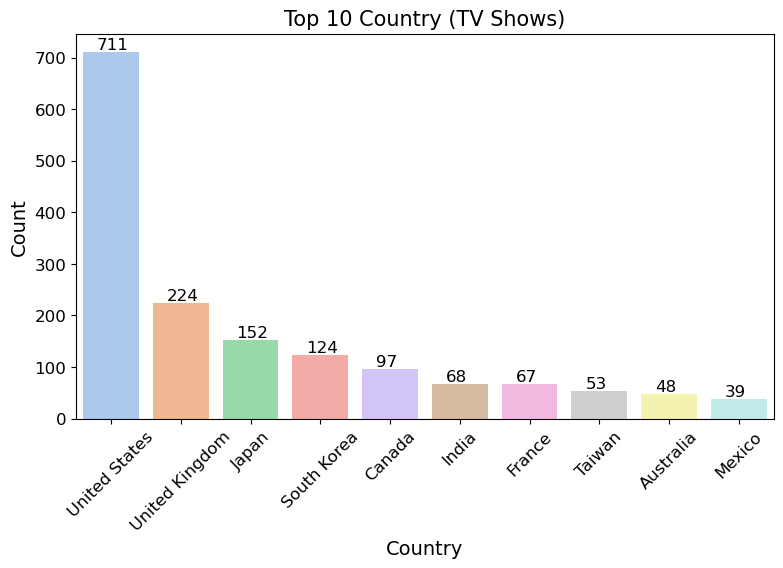

In [359]:
country_df = pd.DataFrame.from_dict(country_count, orient='index', columns=['Count']).reset_index().rename(columns={'index': 'Country'})
country_df.sort_values(by='Count', ascending=False, inplace=True)


plt.figure(figsize=(9,5))
ax = sns.barplot(data=country_df.head(10),x='Country',y='Count',palette='pastel')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+0.2, p.get_height()+5), fontsize=12)

plt.xticks(rotation=45,fontsize=12)
plt.xlabel("Country",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Count",fontsize=14)
plt.title('Top 10 Country (TV Shows)',fontsize=15)

plt.show()

### Q-10: Who are the top 10 directors based on the count of movies and TV shows they directed?

In [298]:
data['director'].value_counts()

Unknown                        1985
Rajiv Chilaka                    15
Jay Karas                        11
Cathy Garcia-Molina              11
Martin Scorsese                  11
                               ... 
Keith Scholey                     1
Don Argott, Sheena M. Joyce       1
Jennifer Lynch                    1
Philippe Falardeau                1
Mark Sloper                       1
Name: director, Length: 3775, dtype: int64

In [361]:
data_new=data.drop(data[data['director']=="Unknown"].index)

In [362]:
director_raw_list = data_new['director'].str.lower().str.split(',')
director_list = [p1.strip().title() for p in director_raw_list for p1 in p]
director_count = Counter(director_list)

director_df = pd.DataFrame.from_dict(director_count, orient='index', columns=['Count']).reset_index().rename(columns={'index': 'Director'})
director_df.sort_values(by='Count', ascending=False, inplace=True)

director_df.head(10)

,Director,Count
1458,Rajiv Chilaka,17
594,Jay Karas,12
1265,Jan Suter,11
1266,Raúl Campos,11
719,Martin Scorsese,11
547,Cathy Garcia-Molina,11
1467,Suhas Kadav,11
891,Marcus Raboy,10
223,Steven Spielberg,10
426,Jay Chapman,9


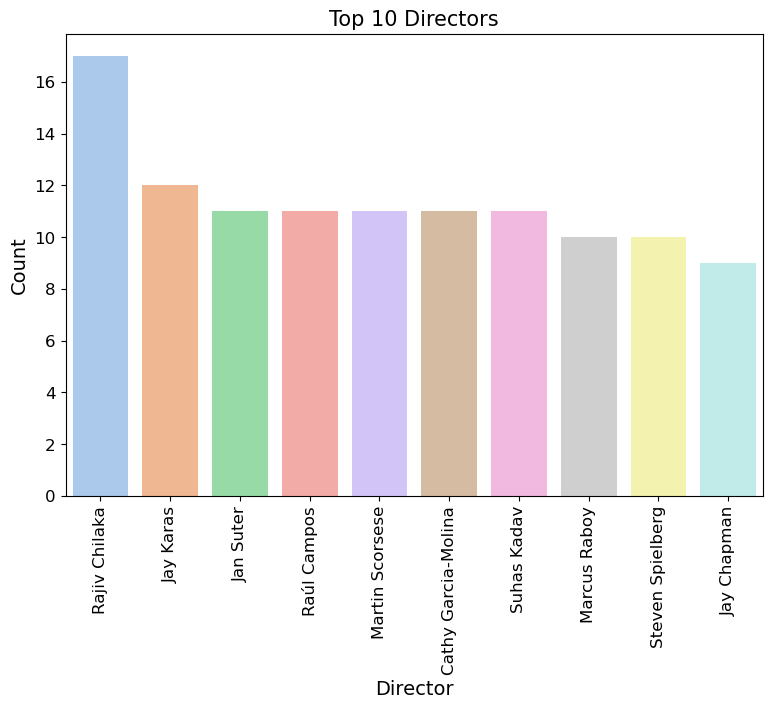

In [367]:
plt.figure(figsize=(9,6))
ax = sns.barplot(data=director_df.head(10),x='Director',y='Count',palette='pastel')
plt.xticks(rotation=90,fontsize=12)
plt.xlabel("Director",fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel("Count",fontsize=14)
plt.title('Top 10 Directors',fontsize=15)
plt.show()

#### INSIGHT: The most popular director is Rajiv Chilaka.

### Q-11: Who are the top 10 actors based on the count of movies and TV shows they have appeared in?

In [369]:
data_new=data.drop(data[data['cast']=="Unknown"].index)

In [370]:
actors_raw_list = data_new['cast'].str.lower().str.split(',')
actors_list = [p1.strip().title() for p in actors_raw_list for p1 in p]
actors_count = Counter(actors_list)

actors_df = pd.DataFrame.from_dict(actors_count, orient='index', columns=['Count']).reset_index().rename(columns={'index': 'Actors'})
actors_df.sort_values(by='Count', ascending=False, inplace=True)

actors_df.head(10)

,Actors,Count
5900,Anupam Kher,35
3756,Takahiro Sakurai,27
810,Akshay Kumar,27
0,Julie Tejwani,26
1652,Om Puri,25
3,Rupa Bhimani,24
831,Naseeruddin Shah,24
628,Yuki Kaji,24
361,Boman Irani,23
2497,Samuel L. Jackson,22


C:\Users\glcn0\anaconda3\envs\new_environment\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


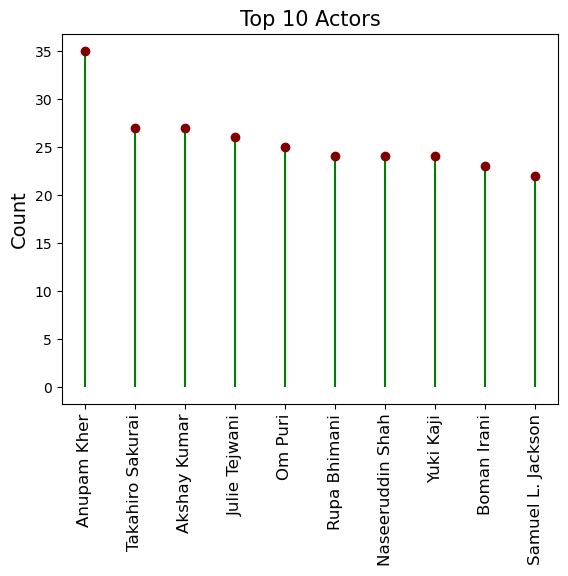

<Figure size 1000x1000 with 0 Axes>

In [371]:
fig, ax = plt.subplots()
x=actors_df.head(10)['Actors']
y=actors_df.head(10)['Count']
fig = plt.figure(figsize = (10, 10))
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation=90, fontsize=12)
ax.set_ylabel("Count", fontsize=14)
ax.set_title('Top 10 Actors', fontsize=15);

#### INSIGHT: The most popular actor is Anupam Kher.

### Q-12: How is the distribution of ratings across different release years?

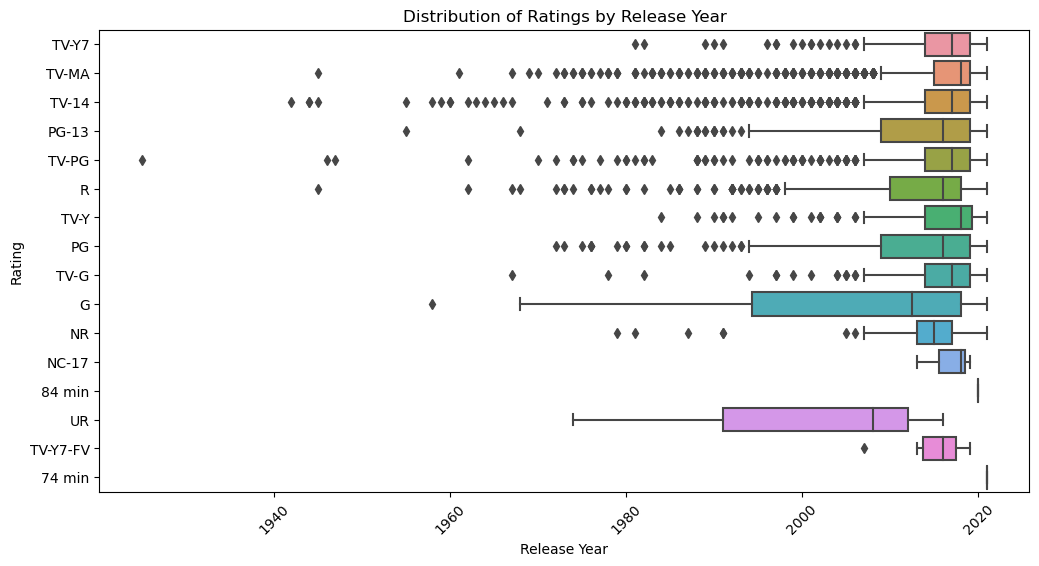

In [303]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='release_year', y='rating', data=data)
plt.title('Distribution of Ratings by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

### Q-13: Can you identify any notable keywords associated with popular TV shows and movies? 

In [304]:
actors_df = actors_df.drop(actors_df[actors_df['Actors'] == 'Unknown'].index)
actors_df

,Actors,Count
5901,Anupam Kher,35
811,Akshay Kumar,27
3757,Takahiro Sakurai,27
0,Julie Tejwani,26
1653,Om Puri,25
...,...,...
13562,Kanako Miyashita,1
13561,Hiroki Iijima,1
13560,Kyoko Yoshine,1
13559,Manuel Chua,1


In [305]:
actor_count_dict = dict(zip(actors_df['Actors'], actors_df['Count']))
actor_count_dict

{'Anupam Kher': 35,
 'Akshay Kumar': 27,
 'Takahiro Sakurai': 27,
 'Julie Tejwani': 26,
 'Om Puri': 25,
 'Rupa Bhimani': 24,
 'Naseeruddin Shah': 24,
 'Yuki Kaji': 24,
 'Boman Irani': 23,
 'Samuel L. Jackson': 22,
 'Amitabh Bachchan': 22,
 'Kareena Kapoor': 22,
 'Paresh Rawal': 21,
 'Rajesh Kava': 20,
 'Shah Rukh Khan': 20,
 'Nicolas Cage': 20,
 'David Attenborough': 19,
 'Ajay Devgn': 18,
 'Yuichi Nakamura': 18,
 'Fred Tatasciore': 18,
 'John Cleese': 18,
 'Jigna Bhardwaj': 18,
 'Adam Sandler': 18,
 'Morgan Freeman': 17,
 'Debi Derryberry': 17,
 'Jackie Shroff': 17,
 'Laura Bailey': 16,
 'David Spade': 16,
 'Salman Khan': 16,
 'Kay Kay Menon': 16,
 'James Franco': 16,
 'Daisuke Ono': 16,
 'Gulshan Grover': 16,
 'Junichi Suwabe': 16,
 'Erin Fitzgerald': 16,
 'Ai Kayano': 16,
 'Yoshimasa Hosoya': 15,
 'Mamoru Miyano': 15,
 'Kate Higgins': 15,
 'Tomokazu Sugita': 15,
 'Fortune Feimster': 15,
 'Tara Strong': 15,
 'Nawazuddin Siddiqui': 15,
 'Anil Kapoor': 15,
 'Asrani': 15,
 'Molly Shanno

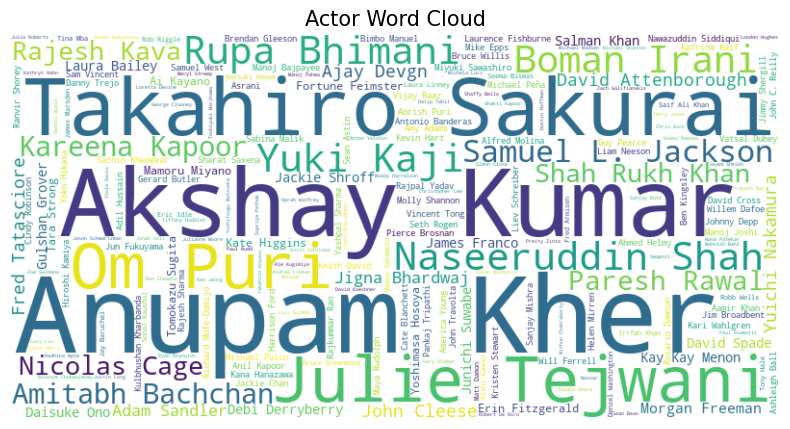

In [306]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(actor_count_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Actor Word Cloud', fontsize=15)
plt.show()

### Q-14: What is the frequency of different genres in the dataset?

In [307]:
df_final1=data.copy()

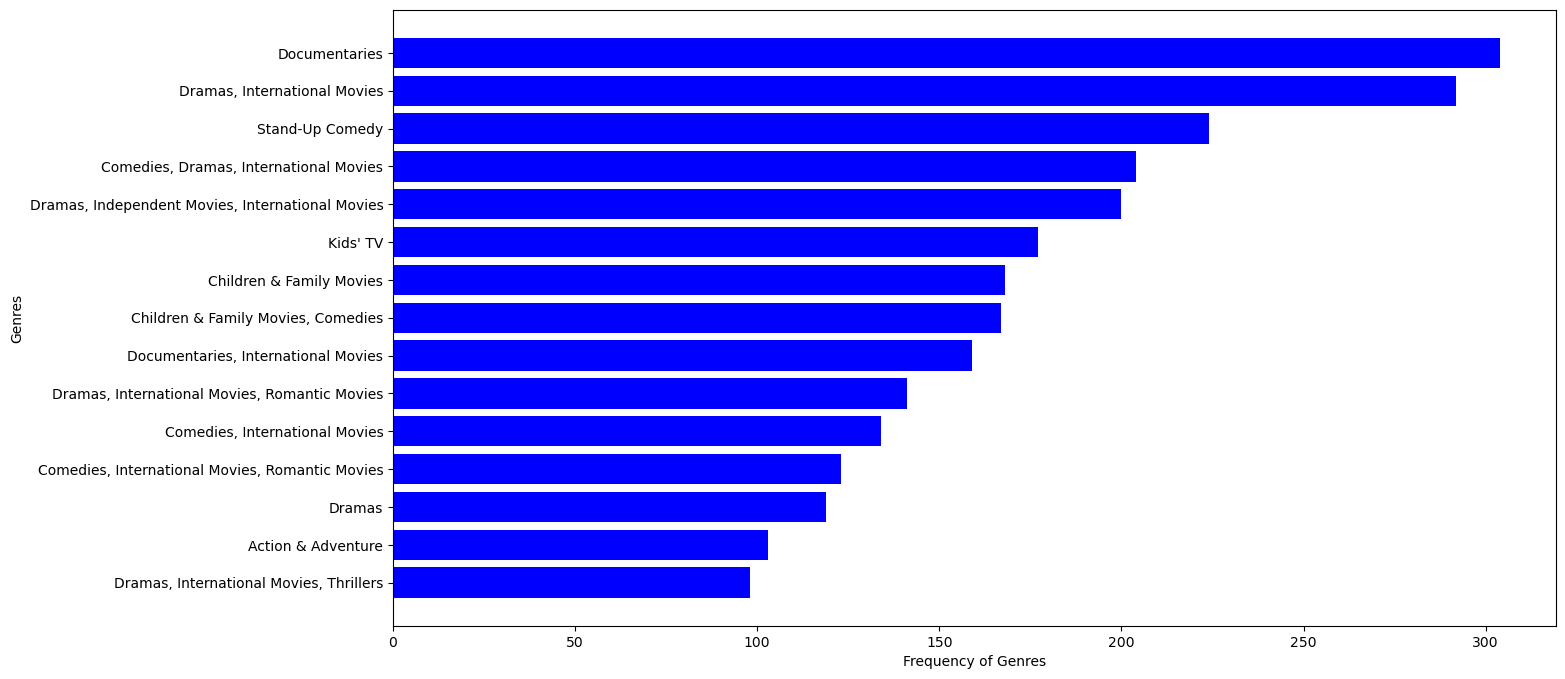

In [308]:
df_genre=df_final1.groupby(['listed_in']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['listed_in'],df_genre[::-1]['title'],color=['blue'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

#### INSIGHT: Documentaries account for the largest portion in terms if the frequency of genres. 

### Q-15: How has the amount of content on Netflix evolved over time, and what trend can be observed starting from 2008 until 2020?

In [309]:
df_year=df_final1.groupby(['release_year']).agg({"title":"nunique"}).reset_index()
df_year.head()

,release_year,title
0,1925.0,1
1,1942.0,1
2,1944.0,2
3,1945.0,3
4,1946.0,1


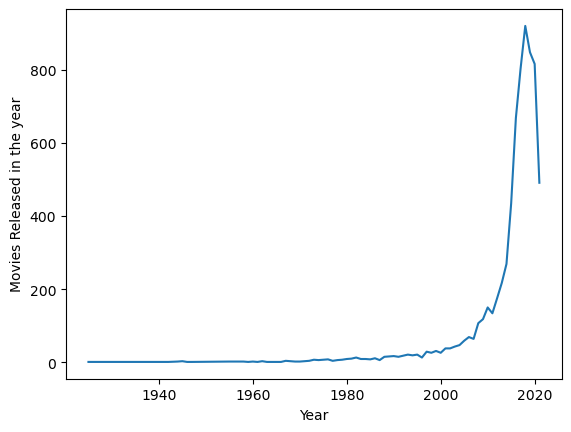

In [310]:
sns.lineplot(data=df_year,x='release_year',y='title')
plt.ylabel("Movies Released in the year")
plt.xlabel("Year")
plt.show()

#### INSIGHT: While there was a steady growth between 1920 to 2000, sudden increase was observed starting from the 2000s, with the trend sharply declining during 2020, most probably after the outbreak of COVID-19.

### Q-16: What is the frequency distribution of TV show durations on Netflix?

In [311]:
df_shows=data[data['type']=='TV Show']

In [312]:
df_duration=df_shows.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_duration

,duration,title
0,1 Season,1365
6,2 Seasons,318
7,3 Seasons,148
8,4 Seasons,62
9,5 Seasons,51
10,6 Seasons,25
11,7 Seasons,18
12,8 Seasons,15
13,9 Seasons,7
1,10 Seasons,3


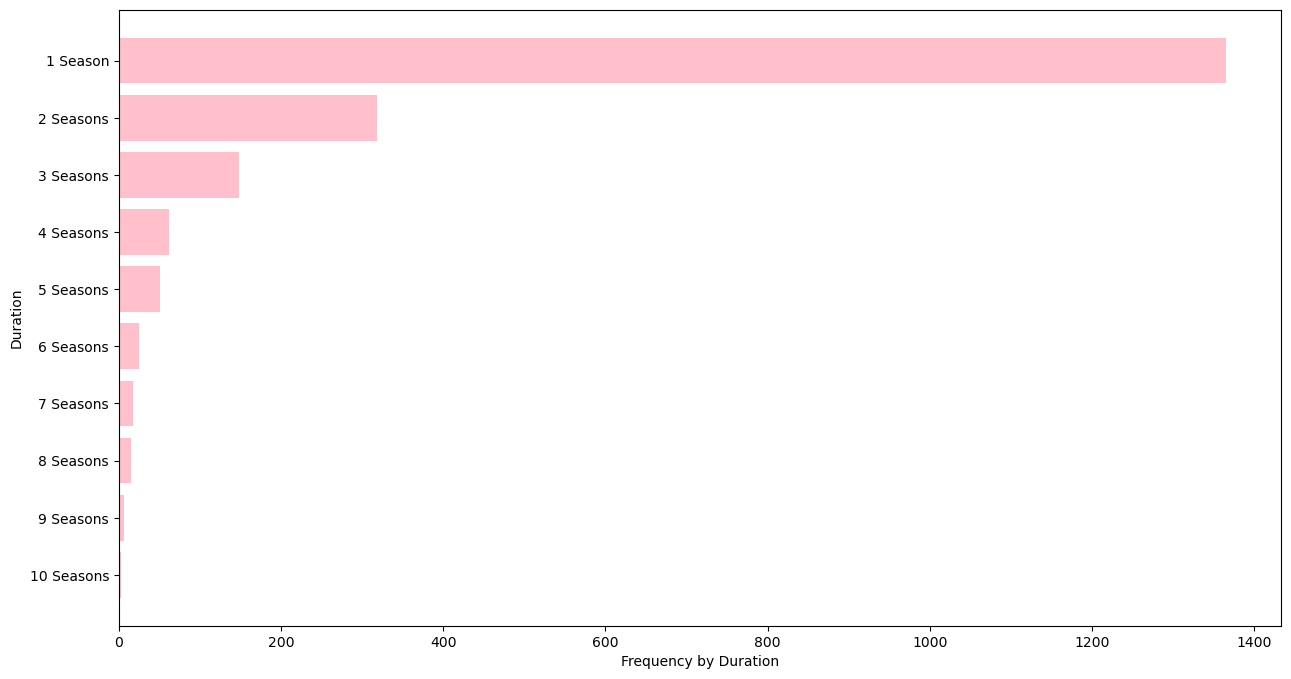

In [313]:
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['pink'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

#### INSIGHT: The majority of TV Shows on Netflix last 1 season, while 10 season-shows are rarely seen.

### Q-17: What is the frequency distribution of movie durations on Netflix?

In [314]:
df_movies=data[data['type']=='Movie']

In [315]:
df_duration=df_movies.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
df_duration

,duration,title
185,90 min,128
190,95 min,122
186,91 min,120
192,97 min,119
188,93 min,115
189,94 min,114
191,96 min,108
194,99 min,104
183,88 min,98
5,103 min,97


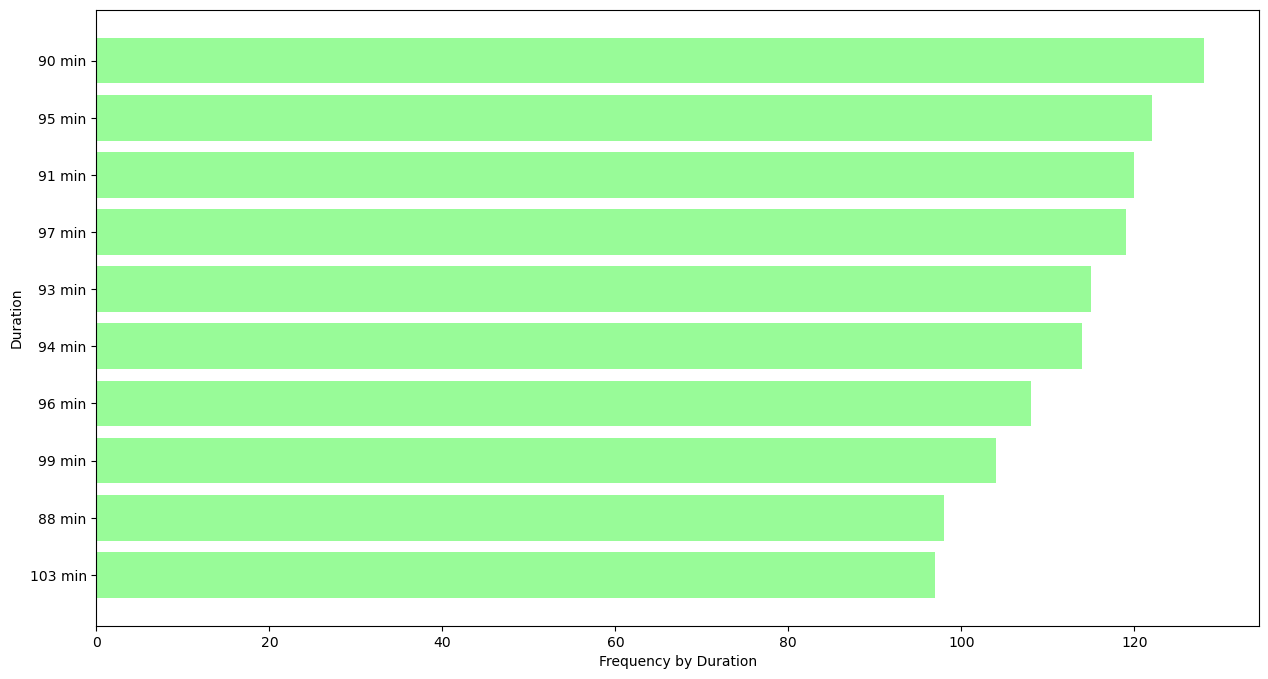

In [316]:
plt.figure(figsize=(15,8))
plt.barh(df_duration[::-1]['duration'], df_duration[::-1]['title'],color=['palegreen'])
plt.xlabel('Frequency by Duration')
plt.ylabel('Duration')
plt.show()

#### INSIGHT: Almost all of the movies on Netflix have duration of higher than 85 minutes.

### Q-18: What are the most popular genres on Netflix based on their frequency counts?

In [317]:
genre_count = data['listed_in'].str.split(',').explode().str.strip().value_counts()
genre_count.head(3)

International Movies    2173
Dramas                  1932
Comedies                1334
Name: listed_in, dtype: int64

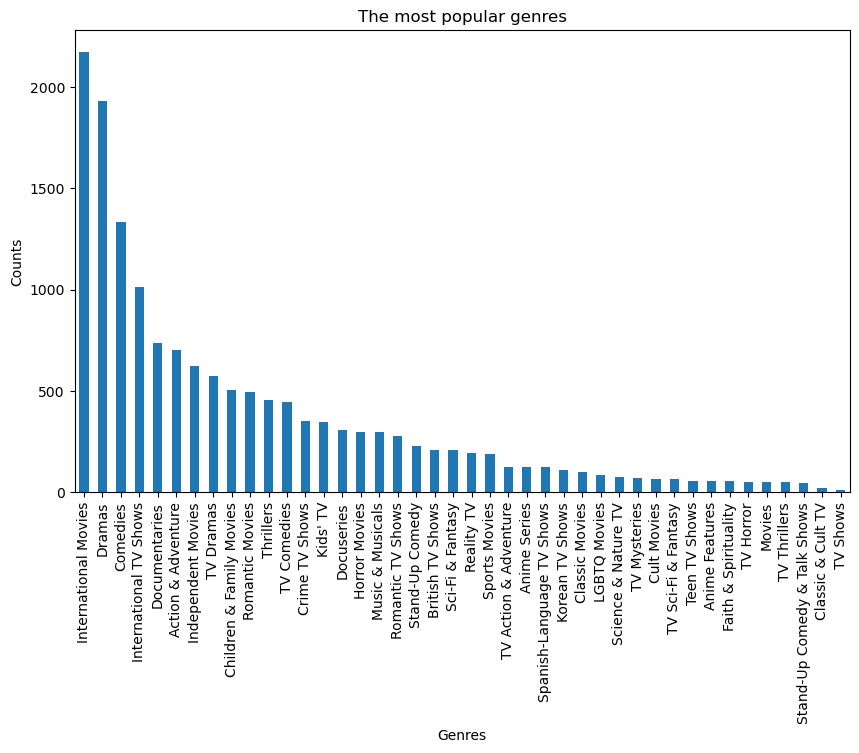

In [318]:
plt.figure(figsize=(10, 6))
genre_count.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.title('The most popular genres')
plt.show()

#### INSIGHT: The most popular ones are International Movies.

### Q-19: What is the distribution of ratings among movies and TV shows on Netflix?

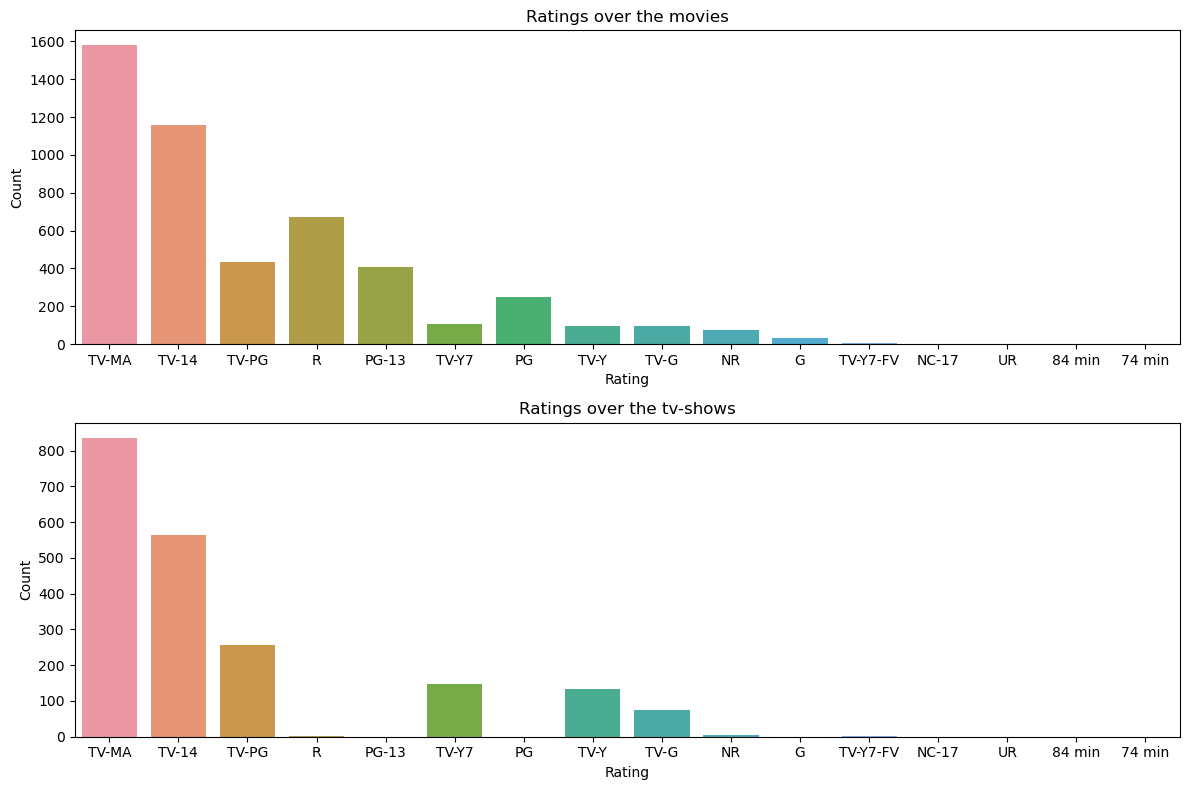

In [319]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.countplot(data=data[data['type'] == 'Movie'], x='rating', order=data['rating'].value_counts().index)
plt.title('Ratings over the movies')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.subplot(2, 1, 2)
sns.countplot(data=data[data['type'] == 'TV Show'], x='rating', order=data['rating'].value_counts().index)
plt.title('Ratings over the tv-shows')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### Q-20: What are the proportions of the most widespread film durations and their corresponding labels?

In [320]:
film_data = data[data['type'] == 'Movie']
film_data['duration'] = film_data['duration'].str.replace(' min', '')
film_data['duration'] = pd.to_numeric(film_data['duration'], errors='coerce')

C:\Users\glcn0\anaconda3\envs\new_environment\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\glcn0\anaconda3\envs\new_environment\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [321]:
timer=film_data["duration"].value_counts()

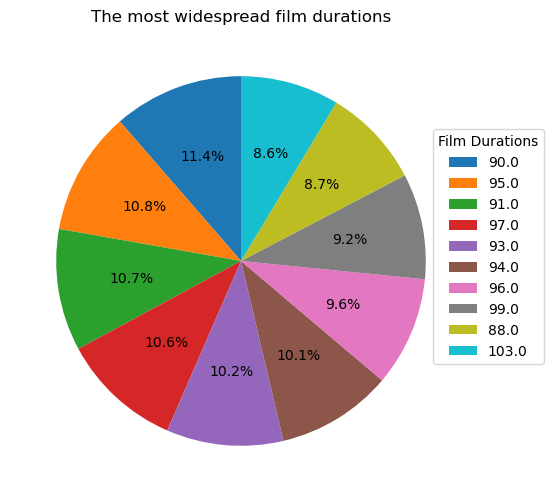

In [322]:
top_10_timer = timer.head(10)
plt.figure(figsize=(6, 6))
plt.pie(top_10_timer, autopct='%1.1f%%', startangle=90)
plt.title('The most widespread film durations')

# Add a legend with best-fit positioning and distance from the pie chart
legend = plt.legend(labels=top_10_timer.index, loc='best', bbox_to_anchor=(1, 0.5), title='Film Durations')

# Adjust the distance by modifying the bbox_to_anchor coordinates
legend.set_bbox_to_anchor((0.9, 0.8))

plt.show()


### Q-21: What does the word cloud visualization of countries based on their counts depict?

In [323]:
country_df1 = data.drop(data[data['country'] == 'Unknown'].index)

In [324]:
country_raw_list = country_df1['country'].str.lower().str.split(',')
country_list = [p1.strip().title() for p in country_raw_list for p1 in p]
country_count = Counter(country_list)
country_df = pd.DataFrame.from_dict(country_count, orient='index', columns=['Count']).reset_index().rename(columns={'index': 'Country'})
country_df.sort_values(by='Count', ascending=False, inplace=True)

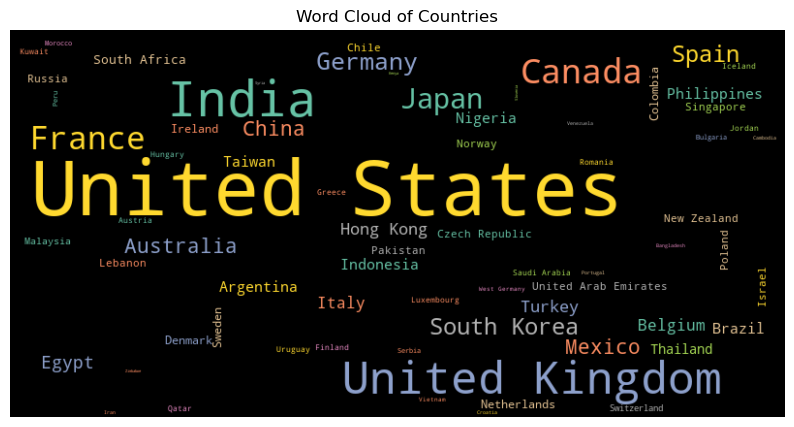

In [325]:
# Create a dictionary from the DataFrame for word cloud generation
wordcloud_dict = dict(zip(country_df['Country'], country_df['Count']))

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap=cm.Set2).generate_from_frequencies(wordcloud_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Countries')
plt.show()

### Q-22: What are the most popular genres in the USA according to the bar chart?

In [326]:
us_data = data[data['country'] == 'United States']
us_genres= us_data['listed_in'].str.split(',').explode().str.strip().value_counts().head(10)
us_genres

Dramas                      498
Comedies                    431
Documentaries               347
Independent Movies          256
Children & Family Movies    227
Action & Adventure          210
TV Comedies                 171
Thrillers                   163
Stand-Up Comedy             155
TV Dramas                   149
Name: listed_in, dtype: int64

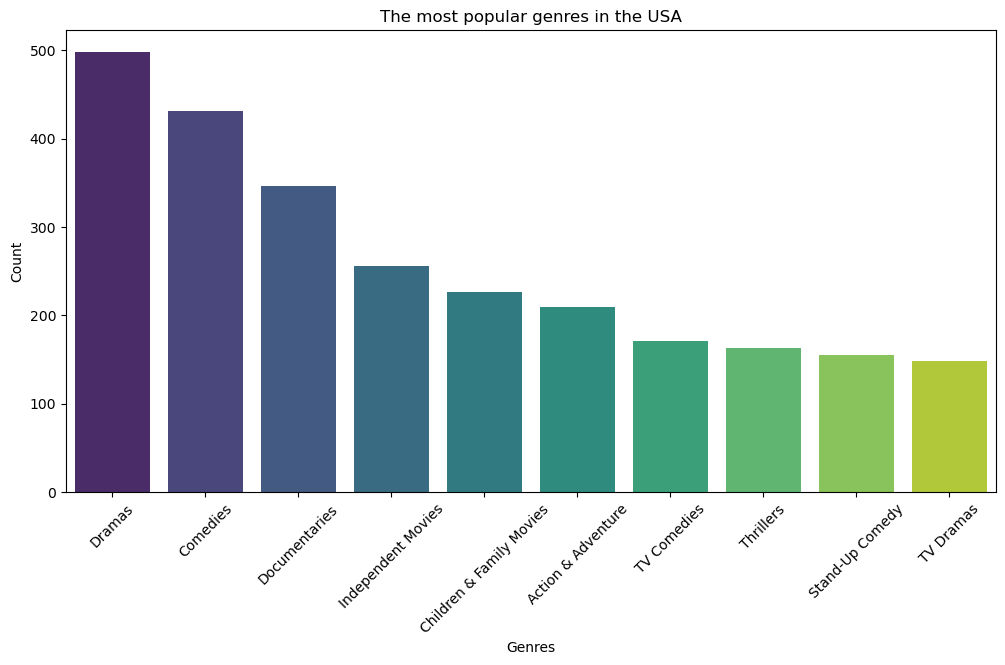

In [327]:
plt.figure(figsize=(12, 6))
sns.barplot(x=us_genres.index, y=us_genres.values, palette='viridis')
plt.title('The most popular genres in the USA')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### INSIGHT: US citizens prefer Dramas over the other genres.

### Q-23: What is the proportion of Turkey compared to the rest of the world based on the pie chart?

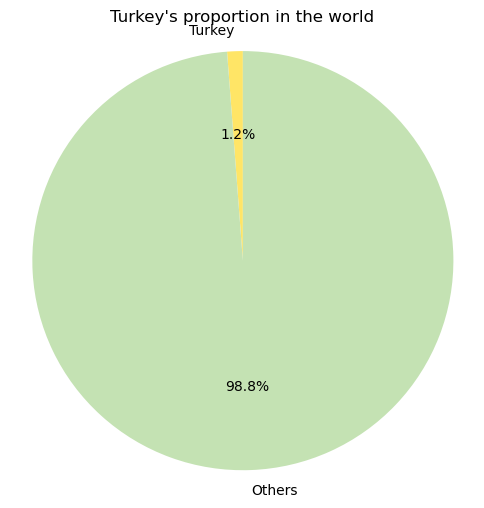

In [328]:
df = data.copy()
turkey_df = df[df['country'] == 'Turkey']

not_turkey = df[df['country'] != 'Turkey'].shape[0]

labels = ['Turkey', 'Others']
sizes = [turkey_df.shape[0], not_turkey]

# Define the colors for the pie chart
colors = ['#FFE566','#C4E2B3']  # Pastel green and yellow

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Turkey's proportion in the world")
plt.axis('equal')
plt.show()

#### INSIGHT: Turkey accounts for only 1.2% on Netflix among other countries. 

<a id='part-4'></a>
# Conclusions

>- The US is the world leader in the TV Shows/movies production on Netflix.
>- The film and show production on Netflix witnessed a significant decline as a result of the adverse effects caused by the COVID-19 pandemic.
>- On Netflix, movies are more preferable than TV Shows. 